Dynamic power flow examples

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from dem import *

matplotlib.rc("figure", figsize=(16,6))
matplotlib.rc("lines", linewidth=2)

N = 100
p_load = np.sin(np.pi*np.arange(N)/N)

# Basic examples

## Time-varying load

array([<matplotlib.axes._subplots.AxesSubplot object at 0x112884fd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x112900a50>], dtype=object)

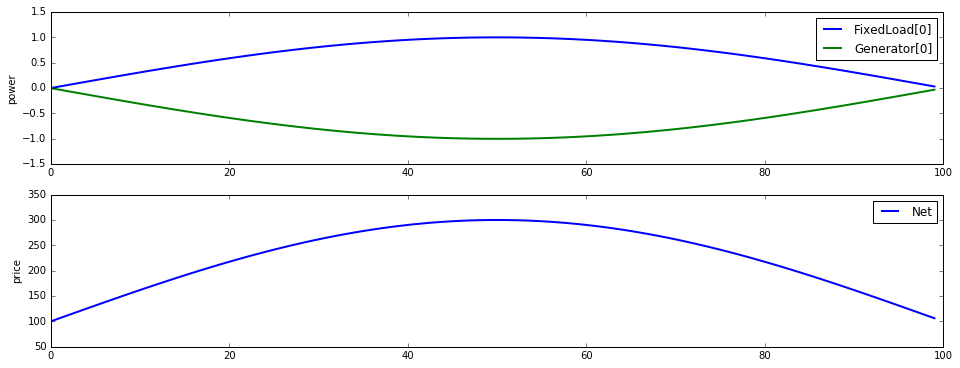

In [76]:
from dem import network
from dem import energy
reload(network)
reload(energy)
Group = network.Group
Generator = energy.Generator
FixedLoad = energy.FixedLoad
Net = network.Net

load = FixedLoad(p=p_load)
gen = Generator(p_max=2, p_min=-0.1, alpha=100, beta=100)

net = Net([load.terminals[0], gen.terminals[0]])
network = Group([load, gen], [net])
network.optimize(time_horizon=N)
network.plot_results()

## Storage

In [ ]:
load = FixedLoad(p=p_load)
gen = Generator(p_max=1000, alpha=0.1, beta=100)
storage = Storage()

net = Net([load.terminals[0], gen.terminals[0], storage.terminals[0]])
network = Group([load, gen, storage], [net])
network.optimize(time_horizon=N)
network.plot_results()

## Deferrable load

In [ ]:
load = FixedLoad(p=p_load)
gen = Generator(p_max=1000, alpha=0.1, beta=100)
deferrable = DeferrableLoad()

net = Net([load.terminals[0], gen.terminals[0], deferrable.terminals[0]])
network = Group([load, gen, deferrable], [net])
network.optimize(time_horizon=N)
network.plot_results()

## Thermal load

In [ ]:
load = FixedLoad(p=p_load)
gen = Generator(p_max=1000, alpha=0.1, beta=100)
thermal = ThermalLoad()

net = Net([load.terminals[0], gen.terminals[0], thermal.terminals[0]])
network = Group([load, gen, dload], [net])
network.optimize(time_horizon=N)
network.plot_results()